In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import os
import glob
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Mounted at /content/drive


実験No	"ログ(bin)
ファイル名"	"電力
ファイル名"	whm_DataFrame.csv	ウェイポイントのファイル名	飛行内容	備考・メモ	実測（地上）	風速(地上)	風速（100m)	風速（600m)	風向（地上）	風向（100m）	風向（600m）	全体重量(g)	機体番号	バッテリーNo	バッテリー電圧 (前)	バッテリー電圧 (後)							    

23	2021-12-14 16-06-28.bin	20211214_1614.log	20211214_1614.log.csv	20211214_600m_上下(10-4).waypoints	ケージ+おもり(470g)+気圧センサ,600m垂直上昇(10m/s)、下降(4m/s)			6	5	7	南西	南西	南西	5014	3	11	25.01	24.1  
24	2021-12-14 16-23-34.bin	20211214_1636.log	20211214_1636.log.csv	20211214_600m_上下(12-4).waypoints	ケージ+おもり(470g)+気圧センサ,600m垂直上昇(12m/s)、下降(4m/s)		7.8	6	5	7	南西	南西	南西	5014	3	3	24.97	24.15  

In [ ]:
# 23	2021-12-14 16-06-28.bin	20211214_1614.log	20211214_1614.log.csv	20211214_600m_上下(10-4).waypoints	ケージ+おもり(470g)+気圧センサ,600m垂直上昇(10m/s)、下降(4m/s)			6	5	7	南西	南西	南西	5014	3	11	25.01	24.1
base_dir_flt = "/content/drive/MyDrive/誘雷ドローン/１２月実験/bin-csv/"
base_dir_whm = "/content/drive/MyDrive/誘雷ドローン/１２月実験/whm-csv/"
LogItemList=["PARM","EV","ERR","ARM","ATT","BAT","CMD","GPS","PSCD","PSCE","PSCN","RCOU","XKF1","IMU","MAG","BARO","AHR2","MODE","XKQ"]

flt_fname="2021-12-14 16-06-28.bin"
whm_fname="20211214_1614.log.csv"

flt_fname_BAT=flt_fname+".BAT.csv"
flt_fname_ATT=flt_fname+".ATT.csv"
flt_fname_EKF=flt_fname+".XKF1.csv"
flt_fname_AHR=flt_fname+".AHR2.csv"
flt_fname_EV=flt_fname+".EV.csv"
flt_fname_GPS=flt_fname+".GPS.csv"
flt_fname_MAG=flt_fname+".MAG.csv"
flt_fname_BAR=flt_fname+".BARO.csv"
flt_fname_PAR=flt_fname+".PARM.csv"
flt_fname_ARM=flt_fname+".ARM.csv"
flt_fname_ERR=flt_fname+".ERR.csv"
flt_fname_CMD=flt_fname+".CMD.csv"
flt_fname_MOD=flt_fname+".MODE.csv"
flt_fname_XKQ=flt_fname+".XKQ.csv"

bat_df=pd.read_csv(base_dir_flt+flt_fname_BAT)
att_df=pd.read_csv(base_dir_flt+flt_fname_ATT)
ekf_df=pd.read_csv(base_dir_flt+flt_fname_EKF)
ahr_df=pd.read_csv(base_dir_flt+flt_fname_AHR)
ev_df=pd.read_csv(base_dir_flt+flt_fname_EV)
arm_df=pd.read_csv(base_dir_flt+flt_fname_ARM)
par_df=pd.read_csv(base_dir_flt+flt_fname_PAR)
gps_df=pd.read_csv(base_dir_flt+flt_fname_GPS)
cmd_df=pd.read_csv(base_dir_flt+flt_fname_CMD)
mod_df=pd.read_csv(base_dir_flt+flt_fname_MOD)
xkq_df=pd.read_csv(base_dir_flt+flt_fname_XKQ)
mag_df=pd.read_csv(base_dir_flt+flt_fname_MAG)
bar_df=pd.read_csv(base_dir_flt+flt_fname_BAR)
err_df=pd.read_csv(base_dir_flt+flt_fname_ERR)

pow_df=pd.read_csv(base_dir_whm+whm_fname)

In [ ]:
# NAV Speed　を取得　m/s に変換
par_df[par_df['Name'].str.contains('WPNAV_SPEED')]
# Mission Plan Auto実行時の水平スピード、上昇スピード、降下スピードの取得(m/s)
val_WPNAV_SPEED=par_df[par_df['Name']=='WPNAV_SPEED'].Value.iloc[-1]/100.0
val_WPNAV_SP_UP=par_df[par_df['Name']=='WPNAV_SPEED_UP'].Value.iloc[-1]/100.0
val_WPNAV_SP_DN=par_df[par_df['Name']=='WPNAV_SPEED_DN'].Value.iloc[-1]/100.0
print(val_WPNAV_SPEED,val_WPNAV_SP_UP,val_WPNAV_SP_DN)

10.0 10.0 4.0


In [ ]:
# Auto Arm と　May be Landの時間の取得(s)
time_autoarm=ev_df[ev_df['Id']==15].timestamp.iloc[-1]
time_land=ev_df[ev_df['Id']==17].timestamp.iloc[-1]
print(time_autoarm,time_land)

1639465592.8989742 1639465903.9065208


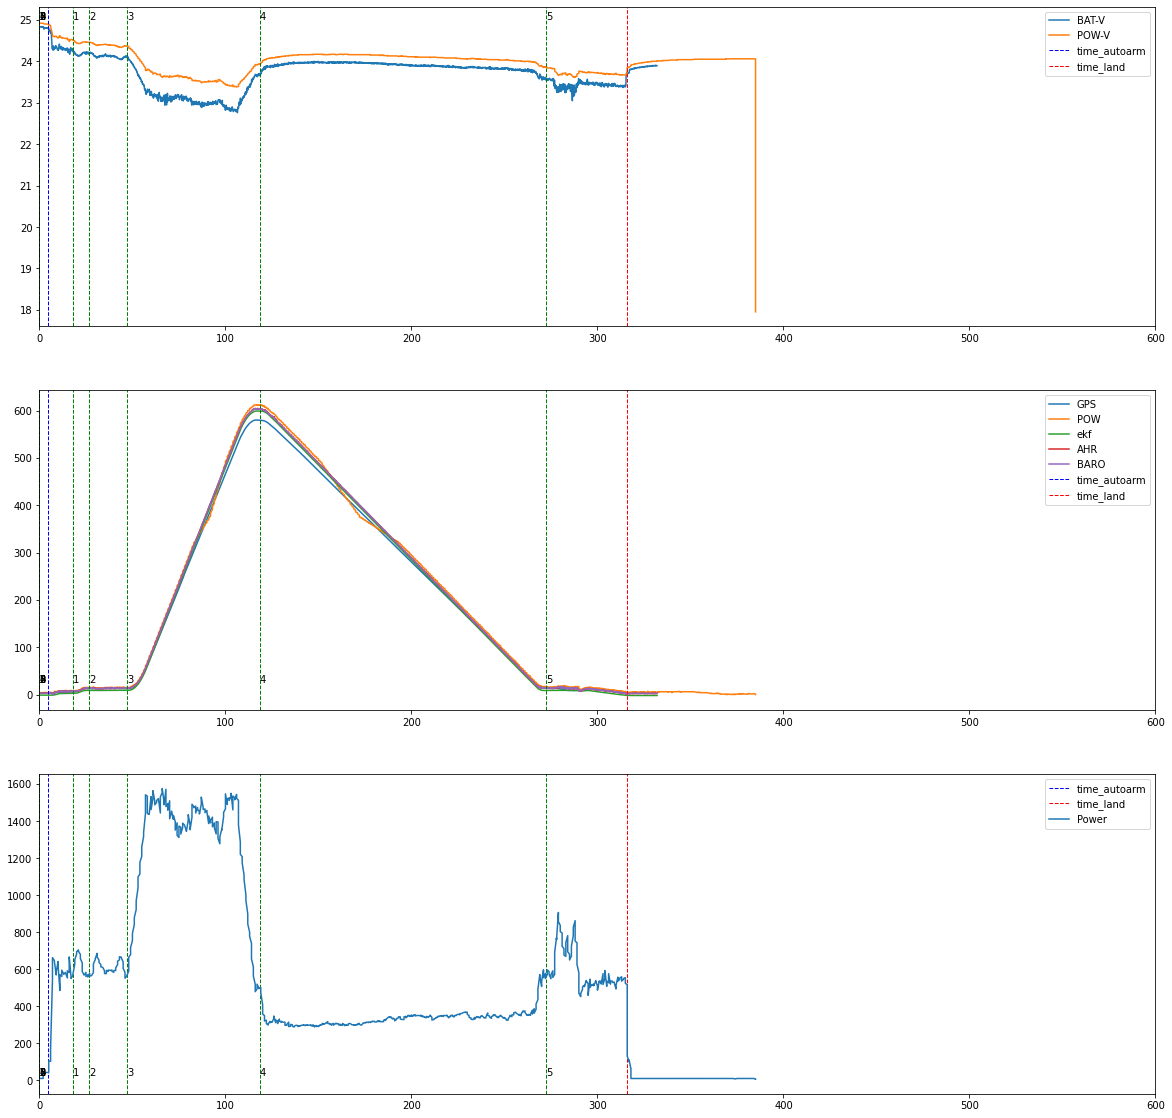

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
#bat_df['Volt'].plot(x=bat_df['TimeUS'])
#pow_df['Volt'].plot(x=pow_df['Second'])
diff_sec=1217
ax[0].set_xlim(0, 600)
ax[1].set_xlim(0, 600)
ax[2].set_xlim(0, 600)
ax[0].plot(bat_df['timestamp']-bat_df['timestamp'][0],bat_df['Volt'],label="BAT-V")
ax[0].plot(pow_df['Second']-diff_sec,pow_df['Volt'],label="POW-V")

#ax[0].axvline(x=time_autoarm-bat_df['timestamp'][0], c='blue', lw=1,ls='--',label='time_autoarm')
#ax[0].axvline(x=time_land-bat_df['timestamp'][0], c='red', lw=1,ls='--',label='LAND')

ax[0].axvline(x=ev_df[ev_df['Id']==15].timestamp.iloc[0]-bat_df['timestamp'][0], c='blue', lw=1,ls='--',label='time_autoarm')
#ax[0].axvline(x=ev_df[ev_df['Id']==15].timestamp.iloc[1]-bat_df['timestamp'][0], c='blue', lw=1,ls='--',label='time_autoarm')
ax[0].axvline(x=ev_df[ev_df['Id']==17].timestamp.iloc[0]-bat_df['timestamp'][0], c='red', lw=1,ls='--',label='time_land')
#ax[0].axvline(x=ev_df[ev_df['Id']==17].timestamp.iloc[1]-bat_df['timestamp'][0], c='red', lw=1,ls='--',label='time_land')

for i,ts in enumerate(cmd_df['timestamp']):
  ts=ts-bat_df['timestamp'][0]
  ax[0].axvline(x=ts, c='green', lw=1,ls='--')
  #plt.text(x=ts,y=cmd_df['Alt'][i],s=str(cmd_df['CNum'][i])+":"+str(cmd_df['CId'][i]))
  ax[0].text(x=ts,y=25,s=str(cmd_df['CNum'][i]))

ax[0].legend()

ax[1].plot(gps_df['timestamp']-gps_df['timestamp'][0],gps_df['Alt'],label='GPS')
ax[1].plot(pow_df['Second']-diff_sec,pow_df['Alt'],label='POW')
ax[1].plot(ekf_df['timestamp']-ekf_df['timestamp'][0],ekf_df['PD']*(-1),label='ekf')
ax[1].plot(ahr_df['timestamp']-ahr_df['timestamp'][0],ahr_df['Alt'],label='AHR')
ax[1].plot(bar_df['timestamp']-ahr_df['timestamp'][0],bar_df['Alt'],label='BARO')

ax[1].axvline(x=ev_df[ev_df['Id']==15].timestamp.iloc[0]-bat_df['timestamp'][0], c='blue', lw=1,ls='--',label='time_autoarm')
#ax[1].axvline(x=ev_df[ev_df['Id']==15].timestamp.iloc[1]-bat_df['timestamp'][0], c='blue', lw=1,ls='--',label='time_autoarm')
ax[1].axvline(x=ev_df[ev_df['Id']==17].timestamp.iloc[0]-bat_df['timestamp'][0], c='red', lw=1,ls='--',label='time_land')
#ax[1].axvline(x=ev_df[ev_df['Id']==17].timestamp.iloc[1]-bat_df['timestamp'][0], c='red', lw=1,ls='--',label='time_land')

for i,ts in enumerate(cmd_df['timestamp']):
  ts=ts-bat_df['timestamp'][0]
  ax[1].axvline(x=ts, c='green', lw=1,ls='--')
  #plt.text(x=ts,y=cmd_df['Alt'][i],s=str(cmd_df['CNum'][i])+":"+str(cmd_df['CId'][i]))
  ax[1].text(x=ts,y=25,s=str(cmd_df['CNum'][i]))

ax[1].legend()

ax[2].axvline(x=ev_df[ev_df['Id']==15].timestamp.iloc[0]-bat_df['timestamp'][0], c='blue', lw=1,ls='--',label='time_autoarm')
#ax[2].axvline(x=ev_df[ev_df['Id']==15].timestamp.iloc[1]-bat_df['timestamp'][0], c='blue', lw=1,ls='--',label='time_autoarm')
ax[2].axvline(x=ev_df[ev_df['Id']==17].timestamp.iloc[0]-bat_df['timestamp'][0], c='red', lw=1,ls='--',label='time_land')
#ax[2].axvline(x=ev_df[ev_df['Id']==17].timestamp.iloc[1]-bat_df['timestamp'][0], c='red', lw=1,ls='--',label='time_land')

for i,ts in enumerate(cmd_df['timestamp']):
  ts=ts-bat_df['timestamp'][0]
  ax[2].axvline(x=ts, c='green', lw=1,ls='--')
  #plt.text(x=ts,y=cmd_df['Alt'][i],s=str(cmd_df['CNum'][i])+":"+str(cmd_df['CId'][i]))
  ax[2].text(x=ts,y=25,s=str(cmd_df['CNum'][i]))
ax[2].plot(pow_df['Second']-diff_sec,pow_df['Pow'],label="Power")
ax[2].legend()


In [ ]:
time_autoarm=[]
time_land=[]
time_autoarm.append(ev_df[ev_df['Id']==15].timestamp.iloc[0]-bat_df['timestamp'][0])
#time_autoarm.append(ev_df[ev_df['Id']==15].timestamp.iloc[1]-bat_df['timestamp'][0])
time_land.append(ev_df[ev_df['Id']==17].timestamp.iloc[0]-bat_df['timestamp'][0])
#time_land.append(ev_df[ev_df['Id']==17].timestamp.iloc[1]-bat_df['timestamp'][0])
print(time_autoarm,time_land)


[4.739915370941162] [315.74746203422546]


In [ ]:
cmd_df

,timestamp,TimeUS,CTot,CNum,CId,Prm1,Prm2,Prm3,Prm4,Lat,Lng,Alt,Frame
0,1.639466e+09,1214308324,6,0,16,0.0,0.0,0.0,0.0,36.643472,136.623904,4.39,0
1,1.639466e+09,1214308333,6,1,16,1.0,0.0,0.0,0.0,36.643537,136.623945,10.00,3
2,1.639466e+09,1214308341,6,2,16,1.0,0.0,0.0,0.0,36.644567,136.624528,10.00,3
3,1.639466e+09,1214308349,6,3,16,1.0,0.0,0.0,0.0,36.644567,136.624528,600.00,3
4,1.639466e+09,1214308356,6,4,16,1.0,0.0,0.0,0.0,36.644567,136.624528,10.00,3
5,1.639466e+09,1214308364,6,5,20,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0
6,1.639466e+09,1232404592,6,1,16,1.0,0.0,0.0,0.0,36.643537,136.623945,10.00,3
7,1.639466e+09,1240929615,6,2,16,1.0,0.0,0.0,0.0,36.644567,136.624528,10.00,3
8,1.639466e+09,1261392170,6,3,16,1.0,0.0,0.0,0.0,36.644567,136.624528,600.00,3
9,1.639466e+09,1332769982,6,4,16,1.0,0.0,0.0,0.0,36.644567,136.624528,10.00,3


In [ ]:
# Missionの　Time stamp　の取得
ts_offset=bat_df['timestamp'][0]
cmd1_df=cmd_df[cmd_df['CTot']==6]
#cmd2_df=cmd_df[cmd_df['CTot']==6]
ts_cmd1_s=time_autoarm[0]
ts_cmd1_0=cmd1_df[cmd1_df['CNum']==0].timestamp
ts_cmd1_1=cmd1_df[cmd1_df['CNum']==1].timestamp.iloc[1]
ts_cmd1_2=cmd1_df[cmd1_df['CNum']==2].timestamp.iloc[1]
ts_cmd1_3=cmd1_df[cmd1_df['CNum']==3].timestamp.iloc[1]
ts_cmd1_4=cmd1_df[cmd1_df['CNum']==4].timestamp.iloc[1]
ts_cmd1_5=cmd1_df[cmd1_df['CNum']==5].timestamp.iloc[1]
ts_cmd1_e=time_land[0]

#ts_cmd2_s=time_autoarm[1]
#ts_cmd2_0=cmd2_df[cmd2_df['CNum']==0].timestamp
#ts_cmd2_1=cmd2_df[cmd2_df['CNum']==1].timestamp.iloc[1]
#ts_cmd2_2=cmd2_df[cmd2_df['CNum']==2].timestamp.iloc[1]
#ts_cmd2_3=cmd2_df[cmd2_df['CNum']==3].timestamp.iloc[1]
#ts_cmd2_4=cmd2_df[cmd2_df['CNum']==4].timestamp.iloc[1]
#ts_cmd2_5=cmd2_df[cmd2_df['CNum']==5].timestamp.iloc[1]
#ts_cmd2_e=time_land[1]

#print(ts_cmd1_3)

In [ ]:
# 区間毎の平均消費電力、最大消費電力の計算　No.19
ts_00=ts_cmd1_0+diff_sec-ts_offset
ts_11=ts_cmd1_1+diff_sec-ts_offset
print(",01:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))


ts_00=ts_cmd1_1+diff_sec-ts_offset
ts_11=ts_cmd1_2+diff_sec-ts_offset
print(",12:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))

ts_00=ts_cmd1_2+diff_sec-ts_offset
ts_11=ts_cmd1_3+diff_sec-ts_offset
print(",23:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))

ts_00=ts_cmd1_3+diff_sec-ts_offset
ts_11=ts_cmd1_4+diff_sec-ts_offset
print(",34:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))

ts_00=ts_cmd1_4+diff_sec-ts_offset
ts_11=ts_cmd1_5+diff_sec-ts_offset
print(",34:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))

ts_00=ts_cmd1_5+diff_sec-ts_offset
ts_11=ts_cmd1_e+diff_sec
print(",4E:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))
print("\n")

,01:dT , 18.1 ,Ave, 388.1 ,Max, 665.9
,12:dT , 8.5 ,Ave, 626.0 ,Max, 703.6
,23:dT , 20.5 ,Ave, 610.7 ,Max, 685.1
,34:dT , 71.4 ,Ave, 1277.5 ,Max, 1574.8
,34:dT , 154.0 ,Ave, 336.6 ,Max, 596.2
,4E:dT , 43.4 ,Ave, 595.7 ,Max, 906.2




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be 

In [ ]:
cmd1_df

,timestamp,TimeUS,CTot,CNum,CId,Prm1,Prm2,Prm3,Prm4,Lat,Lng,Alt,Frame
0,1.639458e+09,423281207,5,0,16,0.0,0.0,0.0,0.0,36.643420,136.624073,2.09,0
1,1.639458e+09,423281215,5,1,16,1.0,0.0,0.0,0.0,36.643755,136.623664,50.00,3
2,1.639458e+09,423281223,5,2,16,1.0,0.0,0.0,0.0,36.643755,136.623664,100.00,3
3,1.639458e+09,423281230,5,3,16,1.0,0.0,0.0,0.0,36.643755,136.623664,50.00,3
4,1.639458e+09,423281238,5,4,20,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0
5,1.639458e+09,450777270,5,1,16,1.0,0.0,0.0,0.0,36.643755,136.623664,50.00,3
6,1.639458e+09,467464824,5,2,16,1.0,0.0,0.0,0.0,36.643755,136.623664,100.00,3
7,1.639458e+09,484307676,5,3,16,1.0,0.0,0.0,0.0,36.643755,136.623664,50.00,3
8,1.639458e+09,513839868,5,4,20,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0


In [ ]:
# 区間毎の平均消費電力、最大消費電力の計算　No.18
ts_00=ts_cmd2_0+diff_sec-ts_offset
ts_11=ts_cmd2_1+diff_sec-ts_offset
print(",01:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))


ts_00=ts_cmd2_1+diff_sec-ts_offset
ts_11=ts_cmd2_2+diff_sec-ts_offset
print(",12:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))

ts_00=ts_cmd2_2+diff_sec-ts_offset
ts_11=ts_cmd2_3+diff_sec-ts_offset
print(",23:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))

ts_00=ts_cmd2_3+diff_sec-ts_offset
ts_11=ts_cmd2_4+diff_sec-ts_offset
print(",34:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))

ts_00=ts_cmd2_4+diff_sec-ts_offset
ts_11=ts_cmd2_5+diff_sec-ts_offset
print(",34:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))

ts_00=ts_cmd2_5+diff_sec-ts_offset
ts_11=ts_cmd2_e+diff_sec
print(",4E:dT ,",round(float(ts_11-ts_00),1),
      ",Ave,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.mean(),1),
      ",Max,",round(pow_df[pow_df['Second'] >=float(ts_00)][pow_df['Second'] <=float(ts_11)].Pow.max(),1))
print("\n")

,01:dT , 25.1 ,Ave, 416.7 ,Max, 801.9
,12:dT , 7.6 ,Ave, 653.6 ,Max, 752.9
,23:dT , 9.6 ,Ave, 623.9 ,Max, 656.3
,34:dT , 31.3 ,Ave, 1001.3 ,Max, 1387.1
,34:dT , 99.6 ,Ave, 570.1 ,Max, 744.5
,4E:dT , 27.6 ,Ave, 626.4 ,Max, 659.1




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Boolean Series key will be 

# ardupilot でのLocation Distance from lat, lon
https://github.com/ArduPilot/ardupilot/blob/4e98636a53f900ed5a724caf305517c7c11cf4cc/libraries/AP_Math/definitions.h



```
// radius of earth in meters
#define RADIUS_OF_EARTH 6378100

// convert a longitude or latitude point to meters or centimeters.
// Note: this does not include the longitude scaling which is dependent upon location
#define LATLON_TO_M     0.011131884502145034
#define LATLON_TO_M_INV 89.83204953368922
#define LATLON_TO_CM    1.1131884502145034
```

https://github.com/peterbarker/ardupilot-skyviper/blob/master/libraries/AP_Math/location.h


```
// scaling factor from 1e-7 degrees to meters at equater
// == 1.0e-7 * DEG_TO_RAD * RADIUS_OF_EARTH
#define LOCATION_SCALING_FACTOR 0.011131884502145034f
// inverse of LOCATION_SCALING_FACTOR
#define LOCATION_SCALING_FACTOR_INV 89.83204953368922f
```



https://github.com/ArduPilot/ardupilot/blob/master/libraries/AP_Common/Location.cpp

```
// return distance in meters between two locations
ftype Location::get_distance(const struct Location &loc2) const
{
    ftype dlat = (ftype)(loc2.lat - lat);
    ftype dlng = ((ftype)diff_longitude(loc2.lng,lng)) * longitude_scale((lat+loc2.lat)/2);
    return norm(dlat, dlng) * LOCATION_SCALING_FACTOR;
}

// return the altitude difference in meters taking into account alt frame.
bool Location::get_alt_distance(const struct Location &loc2, ftype &distance) const
{
    int32_t alt1, alt2;
    if (!get_alt_cm(AltFrame::ABSOLUTE, alt1) || !loc2.get_alt_cm(AltFrame::ABSOLUTE, alt2)) {
        return false;
    }
    distance = (alt1 - alt2) * 0.01;
    return true;
}
```

libraries/AP_Terrain/tools/create_terrain.py
# Python での例
https://www.codegrepper.com/code-examples/python/how+to+find+distance+between+two+coordinates+in+python

In [ ]:
cmd_df

,timestamp,TimeUS,CTot,CNum,CId,Prm1,Prm2,Prm3,Prm4,Lat,Lng,Alt,Frame
0,1.639458e+09,423281207,5,0,16,0.0,0.0,0.0,0.0,36.643420,136.624073,2.09,0
1,1.639458e+09,423281215,5,1,16,1.0,0.0,0.0,0.0,36.643755,136.623664,50.00,3
2,1.639458e+09,423281223,5,2,16,1.0,0.0,0.0,0.0,36.643755,136.623664,100.00,3
3,1.639458e+09,423281230,5,3,16,1.0,0.0,0.0,0.0,36.643755,136.623664,50.00,3
4,1.639458e+09,423281238,5,4,20,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0
5,1.639458e+09,450777270,5,1,16,1.0,0.0,0.0,0.0,36.643755,136.623664,50.00,3
6,1.639458e+09,467464824,5,2,16,1.0,0.0,0.0,0.0,36.643755,136.623664,100.00,3
7,1.639458e+09,484307676,5,3,16,1.0,0.0,0.0,0.0,36.643755,136.623664,50.00,3
8,1.639458e+09,513839868,5,4,20,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0
9,1.639459e+09,1319775983,6,0,16,0.0,0.0,0.0,0.0,36.643433,136.624076,2.55,0


In [ ]:
# Lat Lngから距離の計算

import geopy.distance

coords_1 = (52.2296756, 21.0122287)
coords_2 = (52.406374, 16.9251681)

print(geopy.distance.distance(coords_1, coords_2).m)

coords_1=(cmd_df[cmd_df['CTot']==5].Lat[0],cmd_df[cmd_df['CTot']==5].Lng[0])
coords_2=(cmd_df[cmd_df['CTot']==5].Lat[5],cmd_df[cmd_df['CTot']==5].Lng[5])
print(geopy.distance.distance(coords_1, coords_2).m)

coords_1=(cmd_df[cmd_df['CTot']==5].Lat[6],cmd_df[cmd_df['CTot']==5].Lng[6])
coords_2=(cmd_df[cmd_df['CTot']==5].Lat[7],cmd_df[cmd_df['CTot']==5].Lng[7])
print(geopy.distance.distance(coords_1, coords_2).m)




279352.90160430095
52.140496878704944
0.0


In [ ]:
av_pow=pow_df[pow_df['Second']>diff_sec].Pow.mean()
total_sec=time_land-diff_sec-bat_df['timestamp'][0]
total_pow=av_pow*total_sec/3600.0
print('diff time,'+str(diff_sec)+',sec,')
print('Average Power,'+str(round(av_pow,1))+',VA,')
print('Total Flight Time,'+str(round(total_sec,1))+',sec,')
print('Assumption power,'+str(round(total_pow,1))+',Ah,')

diff time,450,sec,
Average Power,619.2,VA,
Total Flight Time,1634.2,sec,
Assumption power,281.1,Ah,


In [ ]:
# 27 2021-12-15 14-30-53.bin 20211215_1509.log 20211215_1509.log.csv 手動のためなし ホバリング(おもり716)：ケージあり 4.3 10 7 8 南西 南西 南西 5041 3 6 25.16 20.64
flt_fname="2021-12-15 14-30-53.bin"
whm_fname="20211215_1509.log.csv"

flt_fname_BAT=flt_fname+".BAT.csv"
flt_fname_ATT=flt_fname+".ATT.csv"
flt_fname_EKF=flt_fname+".XKF1.csv"
flt_fname_AHR=flt_fname+".AHR2.csv"
flt_fname_EV=flt_fname+".EV.csv"
flt_fname_GPS=flt_fname+".GPS.csv"
flt_fname_MAG=flt_fname+".MAG.csv"
flt_fname_BAR=flt_fname+".BARO.csv"
flt_fname_PAR=flt_fname+".PARM.csv"
flt_fname_ARM=flt_fname+".ARM.csv"
flt_fname_ERR=flt_fname+".ERR.csv"
flt_fname_CMD=flt_fname+".CMD.csv"
flt_fname_MOD=flt_fname+".MODE.csv"
flt_fname_XKQ=flt_fname+".XKQ.csv"

bat_df=pd.read_csv(base_dir_flt+flt_fname_BAT)
att_df=pd.read_csv(base_dir_flt+flt_fname_ATT)
ekf_df=pd.read_csv(base_dir_flt+flt_fname_EKF)
ahr_df=pd.read_csv(base_dir_flt+flt_fname_AHR)
ev_df=pd.read_csv(base_dir_flt+flt_fname_EV)
arm_df=pd.read_csv(base_dir_flt+flt_fname_ARM)
par_df=pd.read_csv(base_dir_flt+flt_fname_PAR)
gps_df=pd.read_csv(base_dir_flt+flt_fname_GPS)
cmd_df=pd.read_csv(base_dir_flt+flt_fname_CMD)
mod_df=pd.read_csv(base_dir_flt+flt_fname_MOD)
xkq_df=pd.read_csv(base_dir_flt+flt_fname_XKQ)
mag_df=pd.read_csv(base_dir_flt+flt_fname_MAG)
bar_df=pd.read_csv(base_dir_flt+flt_fname_BAR)
err_df=pd.read_csv(base_dir_flt+flt_fname_ERR)


pow_df=pd.read_csv(base_dir_whm+whm_fname)

# NAV Speed　を取得　m/s に変換
par_df[par_df['Name'].str.contains('WPNAV_SPEED')]
# Mission Plan Auto実行時の水平スピード、上昇スピード、降下スピードの取得(m/s)
val_WPNAV_SPEED=par_df[par_df['Name']=='WPNAV_SPEED'].Value.iloc[-1]/100.0
val_WPNAV_SP_UP=par_df[par_df['Name']=='WPNAV_SPEED_UP'].Value.iloc[-1]/100.0
val_WPNAV_SP_DN=par_df[par_df['Name']=='WPNAV_SPEED_DN'].Value.iloc[-1]/100.0
print(val_WPNAV_SPEED,val_WPNAV_SP_UP,val_WPNAV_SP_DN)

# Auto Arm と　May be Landの時間の取得(s)
time_autoarm=ev_df[ev_df['Id']==15].timestamp.iloc[-1]
time_land=ev_df[ev_df['Id']==17].timestamp.iloc[-1]
print(time_autoarm,time_land)

10.0 12.0 4.0
1639546256.958975 1639548338.0511827


In [ ]:
# 28 2021-12-15 15-25-56.bin 20211215_1553.log 20211215_1553.log.csv 手動のためなし ホバリング(おもり716)：ケージあり、浮き輪（430）あり 回転後に落下。 4.5 10 7 8 南西 南西 南西 5041 3 12 25.18 22.64
flt_fname="2021-12-15 15-25-56.bin"
whm_fname="20211215_1553.log.csv"

flt_fname_BAT=flt_fname+".BAT.csv"
flt_fname_ATT=flt_fname+".ATT.csv"
flt_fname_EKF=flt_fname+".XKF1.csv"
flt_fname_AHR=flt_fname+".AHR2.csv"
flt_fname_EV=flt_fname+".EV.csv"
flt_fname_GPS=flt_fname+".GPS.csv"
flt_fname_MAG=flt_fname+".MAG.csv"
flt_fname_BAR=flt_fname+".BARO.csv"
flt_fname_PAR=flt_fname+".PARM.csv"
flt_fname_ARM=flt_fname+".ARM.csv"
flt_fname_ERR=flt_fname+".ERR.csv"
flt_fname_CMD=flt_fname+".CMD.csv"
flt_fname_MOD=flt_fname+".MODE.csv"
flt_fname_XKQ=flt_fname+".XKQ.csv"

bat_df=pd.read_csv(base_dir_flt+flt_fname_BAT)
att_df=pd.read_csv(base_dir_flt+flt_fname_ATT)
ekf_df=pd.read_csv(base_dir_flt+flt_fname_EKF)
ahr_df=pd.read_csv(base_dir_flt+flt_fname_AHR)
ev_df=pd.read_csv(base_dir_flt+flt_fname_EV)
arm_df=pd.read_csv(base_dir_flt+flt_fname_ARM)
par_df=pd.read_csv(base_dir_flt+flt_fname_PAR)
gps_df=pd.read_csv(base_dir_flt+flt_fname_GPS)
cmd_df=pd.read_csv(base_dir_flt+flt_fname_CMD)
mod_df=pd.read_csv(base_dir_flt+flt_fname_MOD)
xkq_df=pd.read_csv(base_dir_flt+flt_fname_XKQ)
mag_df=pd.read_csv(base_dir_flt+flt_fname_MAG)
bar_df=pd.read_csv(base_dir_flt+flt_fname_BAR)
err_df=pd.read_csv(base_dir_flt+flt_fname_ERR)


pow_df=pd.read_csv(base_dir_whm+whm_fname)

# NAV Speed　を取得　m/s に変換
par_df[par_df['Name'].str.contains('WPNAV_SPEED')]
# Mission Plan Auto実行時の水平スピード、上昇スピード、降下スピードの取得(m/s)
val_WPNAV_SPEED=par_df[par_df['Name']=='WPNAV_SPEED'].Value.iloc[-1]/100.0
val_WPNAV_SP_UP=par_df[par_df['Name']=='WPNAV_SPEED_UP'].Value.iloc[-1]/100.0
val_WPNAV_SP_DN=par_df[par_df['Name']=='WPNAV_SPEED_DN'].Value.iloc[-1]/100.0
print(val_WPNAV_SPEED,val_WPNAV_SP_UP,val_WPNAV_SP_DN)

# Auto Arm と　May be Landの時間の取得(s)
time_autoarm=ev_df[ev_df['Id']==15].timestamp.iloc[-1]
time_land=ev_df[ev_df['Id']==17].timestamp.iloc[-1]
print(time_autoarm,time_land)

10.0 12.0 4.0
1639549560.0800512 1639550803.8801138


雑

In [ ]:
print(bat_df.columns)
print(att_df.columns)
print(ekf_df.columns)
print(ahr_df.columns)
print(ev_df.columns)
print(arm_df.columns)
print(par_df.columns)
print(gps_df.columns)
print(cmd_df.columns)
print(mod_df.columns)
print(xkq_df.columns)
print(mag_df.columns)
print(bar_df.columns)
print(err_df.columns)

Index(['timestamp', 'TimeUS', 'Instance', 'Volt', 'VoltR', 'Curr', 'CurrTot',
       'EnrgTot', 'Temp', 'Res', 'RemPct'],
      dtype='object')
Index(['timestamp', 'TimeUS', 'DesRoll', 'Roll', 'DesPitch', 'Pitch', 'DesYaw',
       'Yaw', 'ErrRP', 'ErrYaw', 'AEKF'],
      dtype='object')
Index(['timestamp', 'TimeUS', 'C', 'Roll', 'Pitch', 'Yaw', 'VN', 'VE', 'VD',
       'dPD', 'PN', 'PE', 'PD', 'GX', 'GY', 'GZ', 'OH'],
      dtype='object')
Index(['timestamp', 'TimeUS', 'Roll', 'Pitch', 'Yaw', 'Alt', 'Lat', 'Lng',
       'Q1', 'Q2', 'Q3', 'Q4'],
      dtype='object')
Index(['timestamp', 'TimeUS', 'Id'], dtype='object')
Index(['timestamp', 'TimeUS', 'ArmState', 'ArmChecks', 'Forced', 'Method'], dtype='object')
Index(['timestamp', 'TimeUS', 'Name', 'Value'], dtype='object')
Index(['timestamp', 'TimeUS', 'I', 'Status', 'GMS', 'GWk', 'NSats', 'HDop',
       'Lat', 'Lng', 'Alt', 'Spd', 'GCrs', 'VZ', 'Yaw', 'U'],
      dtype='object')
Index(['timestamp', 'TimeUS', 'CTot', 'CNum', 'CId', 'Prm1

In [ ]:
pow_df

,Volt,Amp,MaOut,Alt,Time,Temp,Pow,Second
0,25.15,0.5,0,0,00:00:00,11.5,12.575,0
1,25.15,0.5,0,0,00:00:00,11.5,12.575,0
2,25.15,0.4,0,0,00:00:01,11.5,10.060,1
3,25.15,0.4,0,0,00:00:01,11.5,10.060,1
4,25.15,0.4,0,0,00:00:01,11.5,10.060,1
...,...,...,...,...,...,...,...,...
10071,22.27,18.6,11178,10,00:41:58,22.1,414.222,2518
10072,22.27,18.7,11181,10,00:41:58,22.1,416.449,2518
10073,22.27,18.7,11181,10,00:41:58,22.1,416.449,2518
10074,22.27,17.7,11184,10,00:41:59,22.1,394.179,2519
